__Libraries__

In [15]:
import os
import json
import numpy as np
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt



__Assignement 1__

Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.
Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. Think about the colors you use, how you decided to split the intervals into data classes or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

In [16]:
#load data
#most recent data in this case is 2016
eurostat = pd.read_excel('data/Eurostat_Table_tsdec450NoFlagNoDesc_6a841288-0e2b-48b1-9915-fb161d1ea363.xls', skiprows=[0,1,2])
eurostat = pd.DataFrame({'geo': eurostat['geo'], 'rate': eurostat['2016']})
                        
eurostat

,geo,rate
0,EU (28 countries),8.6
1,EU (27 countries),8.5
2,Euro area (19 countries),10
3,Euro area (18 countries),10
4,Belgium,7.8
5,Bulgaria,7.6
6,Czech Republic,4
7,Denmark,6.2
8,Germany,4.1
9,Estonia,6.8


In [17]:
#we need float data, in do this conversion we delete from the dataset Switzerland
eurostat=eurostat.drop(34)
eurostat.rate = eurostat.rate.astype('float')
eurostat

,geo,rate
0,EU (28 countries),8.6
1,EU (27 countries),8.5
2,Euro area (19 countries),10.0
3,Euro area (18 countries),10.0
4,Belgium,7.8
5,Bulgaria,7.6
6,Czech Republic,4.0
7,Denmark,6.2
8,Germany,4.1
9,Estonia,6.8


In [18]:
#we decide to split the intervals using quartiles
eurostat.describe()

,rate
count,37.000000
mean,8.286486
std,4.201201
min,3.000000
25%,5.900000
50%,7.800000
75%,10.000000
max,23.600000


In [19]:
#load topojson file
state_geo_path = 'topojson/europe.topojson.json'
geo_json_data = json.load(open(state_geo_path))
#topojson file contains informations that we need in keys objects
geo_json_data['objects']

{'europe': {'geometries': [{'arcs': [[[0, 1, 2]],
     [[3]],
     [[4]],
     [[5, 6, 7, 8, 9, 10], [11]]],
    'id': 'AZ',
    'properties': {'NAME': 'Azerbaijan'},
    'type': 'MultiPolygon'},
   {'arcs': [[12, 13, 14, 15, 16, 17, 18]],
    'id': 'AL',
    'properties': {'NAME': 'Albania'},
    'type': 'Polygon'},
   {'arcs': [[[-12]], [[19, -3, 20, 21, -7], [-5], [-4]]],
    'id': 'AM',
    'properties': {'NAME': 'Armenia'},
    'type': 'MultiPolygon'},
   {'arcs': [[22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
    'id': 'BA',
    'properties': {'NAME': 'Bosnia and Herzegovina'},
    'type': 'Polygon'},
   {'arcs': [[32, 33, 34, 35, 36, 37]],
    'id': 'BG',
    'properties': {'NAME': 'Bulgaria'},
    'type': 'Polygon'},
   {'arcs': [[38]],
    'id': 'CY',
    'properties': {'NAME': 'Cyprus'},
    'type': 'Polygon'},
   {'arcs': [[[39]],
     [[40]],
     [[41]],
     [[42]],
     [[43]],
     [[44]],
     [[45]],
     [[46]],
     [[47]],
     [[48]],
     [[49]],
     [[50]],
     [

In [27]:
#choloret map
berlin_coord = [52, 13]
m_europe = folium.Map(berlin_coord,zoom_start=3)
folium.TopoJson(geo_json_data, 'objects.europe').add_to(m_europe)
m_europe.choropleth(geo_json_data,data=eurostat,
             columns=['geo', 'rate'],
             key_on='feature.properties.NAME', #we can use NAME for matching because they are the same in topojson & eurostat
             threshold_scale=[3,5.9,7.8,10,15,23.6],
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployement rate (%)',
                    topojson='objects.europe')

In [28]:
m_europe

TypeError: 'NoneType' object is not subscriptable

__to add:__
__task 1__
*comparison to swizterland using other dataset 
*comments



__Assignement 2__

Go to the amstat website to find a dataset that includes the unemployment rates in Switzerland at a recent date.
Use this data to build another Choropleth map, this time showing the unemployment rate at the level of swiss cantons. Again, try to make the map as expressive as possible, and comment on the trends you observe.

__NB__
*I download the dataset from the italian version of the website, so most part of Cantons name doesn't match with the one of topojson....I've assigned the ID manually because I don't have any other idea, If you can do something better fix this

In [23]:
amstat = pd.read_excel('data/Tasso di disoccupazione.xlsx')
amstat['ID']=['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','SO','BS','BL','SH','AR',
              'AI','SG','GR','AG','TG','FR','TI','VD','VS','NE','GE','JU','TO']
amstat.describe()
#need to traslate all the name from italian to?
amstat

,Canton,Unemployment_rate,Unemployed_registered,Employed_looking_for_job,ID
0,Zurigo,3.3,27225,6931,ZH
1,Berna,2.4,13658,4727,BE
2,Lucerna,1.7,3885,2871,LU
3,Uri,0.6,112,145,UR
4,Svitto,1.7,1455,774,SZ
5,Obwaldo,0.7,153,166,OW
6,Nidwaldo,1.0,248,188,NW
7,Glarona,1.8,416,297,GL
8,Zugo,2.3,1543,1072,ZG
9,Soletta,2.6,3801,2827,SO


In [24]:
#load map
state_geo_path = 'topojson/ch-cantons.topojson.json'
geo_json_data = json.load(open(state_geo_path))
geo_json_data['objects']

{'cantons': {'geometries': [{'arcs': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
    'id': 'ZH',
    'properties': {'name': 'Zürich'},
    'type': 'Polygon'},
   {'arcs': [[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
      [23],
      [24]],
     [[25, 26]],
     [[27]],
     [[28, 29]]],
    'id': 'BE',
    'properties': {'name': 'Bern/Berne'},
    'type': 'MultiPolygon'},
   {'arcs': [[-12, 30, 31, 32, 33, 34]],
    'id': 'LU',
    'properties': {'name': 'Luzern'},
    'type': 'Polygon'},
   {'arcs': [[35, 36, 37, 38, -16, 39, 40, 41]],
    'id': 'UR',
    'properties': {'name': 'Uri'},
    'type': 'Polygon'},
   {'arcs': [[42, -33, 43, -1, 44, 45, 46, -42]],
    'id': 'SZ',
    'properties': {'name': 'Schwyz'},
    'type': 'Polygon'},
   {'arcs': [[[-13, -35, 47]], [[-15, 48, -40]]],
    'id': 'OW',
    'properties': {'name': 'Obwalden'},
    'type': 'MultiPolygon'},
   {'arcs': [[-34, -43, -41, -49, -14, -48]],
    'id': 'NW',
    'properties': {'name': 'Nidwalden'},
    'type': 'P

In [29]:
berna_coord = [46, 7]
m_Swiss = folium.Map(berna_coord,zoom_start=7)
folium.TopoJson(geo_json_data, 'objects.cantons').add_to(m_Swiss)
m_Swiss.choropleth(geo_json_data,data=amstat,
             columns=['ID','Unemployment_rate'],#now we use the attribute that we created ID
             key_on='feature.id',
             threshold_scale=[0.6,1.7,2.6,3.05,5.2],
             fill_color='PuRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployement rate (%)',
                    topojson='objects.cantons')
m_Swiss

The Swiss Confederation defines the rates you have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). This is surely a valid choice, but as we discussed one could argue for a different categorization.

Copy the map you have just created, but this time don't count in your statistics people who already have a job and are looking for a new one. How do your observations change ? You can repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

__NB__ I use only the metric suggested. If you want on the website you can download other data, but now I don't remember which

In [30]:
#proportion of real unemployed 
amstat['New rate'] = amstat['Unemployed_registered']/(amstat['Employed_looking_for_job']+amstat['Unemployed_registered'])
amstat['New rate'] = amstat['New rate']*amstat['Unemployment_rate']

#As before use of quartile to define intervals
amstat.describe()


,Unemployment_rate,Unemployed_registered,Employed_looking_for_job,New rate
count,27.000000,27.000000,27.000000,27.000000
mean,2.540741,9864.370370,4478.148148,1.668556
std,1.253383,25420.268195,11365.088753,0.999903
min,0.600000,62.000000,40.000000,0.261479
25%,1.700000,1226.000000,765.000000,1.038442
50%,2.600000,3801.000000,1713.000000,1.538624
75%,3.050000,5664.500000,3422.000000,2.063209
max,5.200000,133169.000000,60455.000000,4.105104


In [33]:
berna_coord = [46, 7]
m_Swiss2 = folium.Map(berna_coord,zoom_start=7)
folium.TopoJson(geo_json_data, 'objects.cantons').add_to(m_Swiss2)
m_Swiss2.choropleth(geo_json_data,data=amstat,
             columns=['ID','New rate'],
             key_on='feature.id',
             threshold_scale=[0.26,1.038,1.53,2.06,4.1],
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployement rate (%)',
                    topojson='objects.cantons')

m_Swiss2


__Assignement 3__

Use the amstat website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between Swiss and foreign workers.
Show the difference in unemployment rates between the two categories in each canton on a Choropleth map (hint The easy way is to show two separate maps, but can you think of something better ?). Where are the differences most visible ? Why do you think that is ?

__NB__
I've plot two differen map, one for foreing and one for swiss, and then I plot one map using the difference of rate in each canton
__TO ADD__ comments

In [27]:
amstat_nation = pd.read_excel('data/Tasso di disoccupazione_foreign.xlsx', skiprows=[1])
amstat_nation2 = amstat_nation.copy()#for task 4th 
amstat_swiss = amstat_nation.loc[amstat_nation.Nationality=='svizzeri'] #svizzeri=swiss
amstat_swiss['ID']=['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','SO','BS','BL','SH','AR',
              'AI','SG','GR','AG','TG','FR','TI','VD','VS','NE','GE','JU']
amstat_swiss.describe()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Unemployments_rate,Unemployed_registered,Employed_looking_for_ job
count,26.000000,26.000000,26.000000
mean,1.957692,2854.461538,1187.038462
std,1.126472,3523.350590,1035.878930
min,0.400000,39.000000,30.000000
25%,1.325000,652.000000,401.750000
50%,1.850000,1953.500000,843.000000
75%,2.425000,2866.250000,1668.500000
max,4.800000,15114.000000,3658.000000


In [16]:
#swiss 
m_Swiss_sw = folium.Map(berna_coord,zoom_start=7)
folium.TopoJson(geo_json_data, 'objects.cantons').add_to(m_Swiss_sw)
m_Swiss_sw.choropleth(geo_json_data,data=amstat_swiss,
             columns=['ID','Unemployments_rate'],
             key_on='feature.id',
             threshold_scale=[0.4,1.325,1.85,2.425,4.8],
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployement rate (%)',
                    topojson='objects.cantons')
m_Swiss_sw

In [17]:
amstat_foreing = amstat_nation.loc[amstat_nation.Nationality=='stranieri']#stranieri=foreing
amstat_foreing['ID']=['ZH','BE','LU','UR','SZ','OW','NW','GL','ZG','SO','BS','BL','SH','AR',
              'AI','SG','GR','AG','TG','FR','TI','VD','VS','NE','GE','JU']
amstat_foreing.describe()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unemployments_rate,Unemployed_registered,Employed_looking_for_ job
count,26.000000,26.000000,26.000000
mean,4.465385,2267.423077,1138.153846
std,1.618133,2869.023585,1018.647562
min,2.000000,23.000000,10.000000
25%,3.400000,510.500000,270.500000
50%,4.600000,1581.000000,834.500000
75%,5.250000,2258.750000,1675.500000
max,9.000000,12111.000000,3902.000000


In [18]:
#foreing
m_Swiss_fo = folium.Map(berna_coord,zoom_start=7)
folium.TopoJson(geo_json_data, 'objects.cantons').add_to(m_Swiss_fo)
m_Swiss_fo.choropleth(geo_json_data,data=amstat_foreing,
             columns=['ID','Unemployments_rate'],
             key_on='feature.id',
             threshold_scale=[1,2,3.4,4.6,5.25,9],
             fill_color='BuGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployement rate (%)',
                    topojson='objects.cantons')
m_Swiss_fo

In [21]:
amstat_nation = pd.merge(amstat_swiss, amstat_foreing, how='inner', on=['Canton','ID'], suffixes=('_sw', '_fo'))
amstat_nation['rate_difference']=amstat_nation.Unemployments_rate_sw-amstat_nation.Unemployments_rate_fo
amstat_nation.describe()
#25 50 75 in this case are very near-->to obtain a visualization more precise for this time we don't use quantiles

,Unemployments_rate_sw,Unemployed_registered_sw,Employed_looking_for_ job_sw,Unemployments_rate_fo,Unemployed_registered_fo,Employed_looking_for_ job_fo,rate_difference
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1.957692,2854.461538,1187.038462,4.465385,2267.423077,1138.153846,-2.507692
std,1.126472,3523.350590,1035.878930,1.618133,2869.023585,1018.647562,0.882688
min,0.400000,39.000000,30.000000,2.000000,23.000000,10.000000,-5.400000
25%,1.325000,652.000000,401.750000,3.400000,510.500000,270.500000,-2.875000
50%,1.850000,1953.500000,843.000000,4.600000,1581.000000,834.500000,-2.450000
75%,2.425000,2866.250000,1668.500000,5.250000,2258.750000,1675.500000,-2.000000
max,4.800000,15114.000000,3658.000000,9.000000,12111.000000,3902.000000,-0.900000


In [22]:
m_Swiss_nation = folium.Map(berna_coord,zoom_start=7)
folium.TopoJson(geo_json_data, 'objects.cantons').add_to(m_Swiss_nation)
m_Swiss_nation.choropleth(geo_json_data,data=amstat_nation,
             columns=['ID','rate_difference'],
             key_on='feature.id',
             threshold_scale=[-5.4,-2.875,-2.57,-2.27,-2,-0.9],
             fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Difference between unemployment rate of Swiss and foreing workers',
                    topojson='objects.cantons')
m_Swiss_nation

Now let's refine the analysis by adding the differences between age groups. As you may have guessed it is nearly impossible to plot so many variables on a map. Make a bar plot, which is a better suited visualization tool for this type of multivariate data.

In [23]:
amstat_age = pd.read_excel('data/Tasso di disoccupazione_age.xlsx')
#I did not find a dataset that give rate for swiss or foreing of a certain age class
#and I did not think about derive this kind of data 
###ADD comments

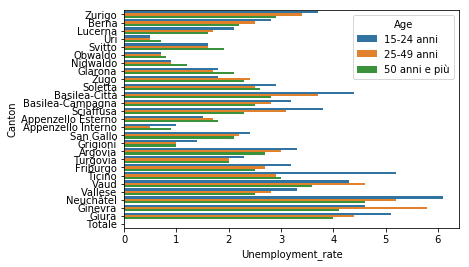

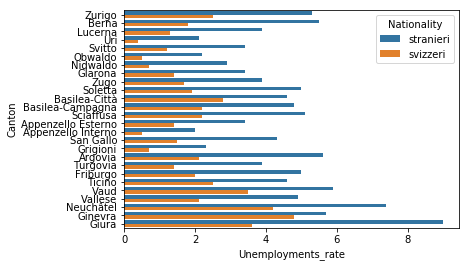

In [28]:
sns.barplot(x="Unemployment_rate", y="Canton", hue='Age',data=amstat_age);
plt.show()

sns.barplot(x="Unemployments_rate", y="Canton", hue='Nationality',data=amstat_nation);
plt.show()

__Assignement 4__

BONUS: using the map you have just built, and the geographical information contained in it, could you give a rough estimate of the difference in unemployment rates between the areas divided by the Röstigraben?

Finally we save the map produced in html format,

In [29]:
m_europe.save('europe.html')
m_Swiss.save('swiss.html')
m_Swiss2.save('swiss2.html')
m_Swiss_sw.save('swiss_sw.html')
m_Swiss_fo.save('swiss_fo.html')
m_Swiss_nation.save('swiss_nation.html')